In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [350]:
civic=pd.read_csv("civic.csv")
civic.head()

,lat,lng,type,category
0,42.567534,1.602579,Aparthotels,Accommodation
1,42.538295,1.733278,Aparthotels,Accommodation
2,42.540192,1.733671,Aparthotels,Accommodation
3,42.541222,1.731859,Aparthotels,Accommodation
4,42.541724,1.731437,Aparthotels,Accommodation


In [351]:
tripadvisor=pd.read_csv("Tripadvisorplaces.csv")
tripadvisor.head()

,rating,long,place,address,lat,type
0,4.5,1.521835,\n\nHesperia Andorra la Vella\n,"Avinguda Doctor Mitjavila, 1 | Rotonda, Andorr...",42.506317,hotel
1,4.5,1.522746,\n\nAndorra Park Hotel\n,"C. Les Canals, 24, Andorra la Vella AD500, And...",42.509279,hotel
2,4.0,1.519714,\n\nHoliday Inn Andorra\n,"C/ Prat de la Creu 88, Andorra la Vella AD500,...",42.505710,hotel
3,4.5,1.532549,\n\nHotel Plaza\n,"C/ Na Maria Pla 19-21, Andorra la Vella AD500,...",42.506940,hotel
4,4.5,1.666049,\n\nSport Hotel Hermitage & Spa\n,"Crta General s/n, Soldeu AD100, Andorra",42.577791,hotel


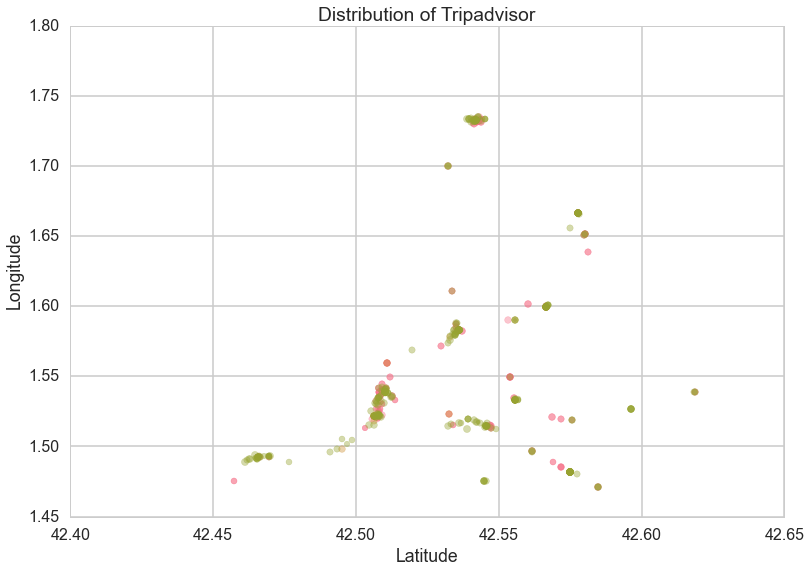

In [352]:
colors = sns.color_palette("husl", 8)
cluster_c=0
line=[]
for cluster in tripadvisor['type'].unique():

    count = 0
    for ind in tripadvisor[tripadvisor['type']==cluster].index:
        ind=int(ind)
        count +=1
        if count==1:
            x=tripadvisor.loc[ind,'lat'].tolist()

            y=tripadvisor.loc[ind,'long'].tolist()
            size=tripadvisor.loc[ind,'rating'].tolist()
            p=plt.scatter(float(x), float(y), color=colors[1], label=cluster, s=size*10, alpha=0.4)
            line.append(p)
        else:
            x=tripadvisor.loc[ind,'lat']
            y=tripadvisor.loc[ind,'long']
            size=tripadvisor.loc[ind,'rating'].tolist()
            p=plt.scatter(float(x), float(y), color=colors[cluster_c], s=size*10, alpha=0.4)
            line.append(p)
    cluster_c+=1
    

plt.title("Distribution of Tripadvisor")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

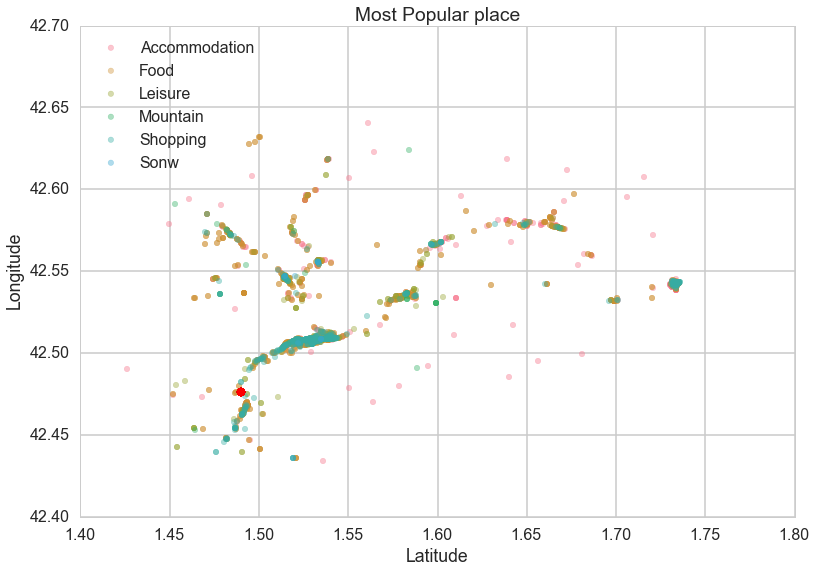

In [353]:
colors = sns.color_palette("husl", 8)
cluster_c=0
cat=civic['category'].unique().tolist()

for i,cluster in enumerate(cat):

    count = 0
    for ind in civic[civic['category']==cluster].index:
        ind=int(ind)
        count +=1
        if count==1:
            x=civic.loc[ind,'lat'].tolist()
            y=civic.loc[ind,'lng'].tolist()

            plt.scatter(float(y), float(x), color=colors[i], label=cluster, s=3*10, alpha=0.4)
        else:
            x=civic.loc[ind,'lat']
            y=civic.loc[ind,'lng']

            plt.scatter(float(y), float(x), color=colors[i], s=3*10, alpha=0.4)

            x=best[0]
            n=i+1
            plt.scatter(1.489722,42.475833, color='red', s=6*10, alpha=0.5)
plt.legend(loc='upper left')    
plt.title("Most Popular place")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

According to the geo_location of place_id, could categorize their tag of Tripadvisor. If the tower is surrounded by stores, the place_id will be shopping interest area, if the tower is surround by the theater or city hall, then the area is belonged to events interest, if the tower is surrounded by national park and trial attraction, then it is Nature interest.

In [3]:
data=pd.read_csv("Travel_id.csv")
data.head()

,place_id,latitude,longitude,Cluster,Code,interest index,Category code,Category
0,180,42.475833,1.489722,CL0 - StJulia,1,7,7,Events Interest
1,181,42.475833,1.489722,CL0 - StJulia,1,7,7,Events Interest
2,1630,42.475833,1.489722,CL0 - StJulia,1,7,7,Events Interest
3,1631,42.475833,1.489722,CL0 - StJulia,1,7,7,Events Interest
4,10,42.460278,1.491111,CL0 - StJulia,1,4,"2,4","Nature Interest, Leisure Interest"


In [292]:
id_interest={}
id_lat={}
id_lng={}
id_cat={}
for ind in data.index:
    ind=int(ind)
    y=str(data.loc[ind,'place_id'].tolist())
    id_interest[y]=data.loc[ind,'interest index'].tolist()
    id_lat[y]=data.loc[ind,'latitude'].tolist()
    id_lng[y]=data.loc[ind,'longitude'].tolist()
    id_cat[y]=data.loc[ind,'Category']

    


In [295]:
id_cat['3530']

'Nature Interest, Leisure Interest'

In [86]:
index_grouped=data.groupby('interest index')

In [4]:
tower_area=pd.read_csv("towersArea.csv")
tower_area.head()

,2G / 3G / 4G,Group,Cluster,CELL NAME,CELL ID,CELL Latitude WGS84,CELL Longitude WGS84,CELL AREA
0,3G,U2100-F1,CL0 - StJulia,TAPIA_NORD-0,180,42.476000,1.489722,TAPIA_NORD
1,3G,U2100-F1,CL0 - StJulia,TAPIA_NORD-1,181,42.476000,1.489722,TAPIA_NORD
2,2G,G900,CL0 - StJulia,TAPIAN0,1630,42.476000,1.489722,TAPIA_NORD
3,2G,G900,CL0 - StJulia,TAPIAN1,1631,42.476000,1.489722,TAPIA_NORD
4,3G,U900-F1,CL2 - Massana,ALIGA-A,9160,42.557353,1.497867,ALIGA


In [80]:
tower_ids=list(set(tower_area['CELL ID'].values.tolist()))
len(tower_ids)

330

In [13]:
cat=set(data['interest index'].values.tolist())
cat

{1, 2, 3, 4, 5, 6, 7, 8, 9}

based on the dataframe we create previously, which contains how many days each user visit in a month, and the days they spend in each city.

In [15]:
sp=pd.read_csv("201501_spain_cdr_user_cities.csv")
sp.head()

,user_id,CL0 - StJulia,CL1 - Centre,CL2 - Massana,CL3 - Arans,CL4 - Encamp,CL5 - Soldeu,CL6 - PasDeLaCasa,Global,Other,Days
0,3c0acda2ce48e05127e8942a334d349f3bf489afe01f78...,0,1,0,0,1,0,0,0,0,1
1,26dd7c1d853b228cae5d21cf1a4d7143baaabad8299165...,2,2,0,0,0,0,0,0,0,2
2,62d8291d684faf05dc810119a5e13efb3b2b418e78e5d8...,1,0,0,0,0,0,0,0,0,1
3,6eee79335427efbcb9706bf4dd694d5ef2d263db08a366...,1,0,0,0,0,0,0,0,0,1
4,534cc857bd338f88064a523a7dd5547f4071243e833c02...,1,0,0,0,0,0,0,0,0,1


create a subframe from original data

In [228]:
c0=sp['CL0 - StJulia']
c1=sp['CL1 - Centre']
c2=sp['CL2 - Massana']
c3=sp['CL3 - Arans']
c4=sp['CL4 - Encamp']
c5=sp['CL5 - Soldeu']
c6=sp['CL6 - PasDeLaCasa']
d=sp['Days']
sp_df=pd.concat([c0,c1, c2, c3,c4,c5,c6,d], axis=1)
sp_df.head()

,CL0 - StJulia,CL1 - Centre,CL2 - Massana,CL3 - Arans,CL4 - Encamp,CL5 - Soldeu,CL6 - PasDeLaCasa,Days
0,0,1,0,0,1,0,0,1
1,2,2,0,0,0,0,0,2
2,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1


In [229]:
from sklearn.cross_validation import train_test_split
itrainF, itestF = train_test_split(fr_df, train_size=0.6)
SPKM=km.fit(itrainF, y=None)

In [244]:
from sklearn import cluster
spkm=sklearn.cluster.KMeans(init='k-means++', max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1)
spkm.fit(sp_df, y=None)
sptourist_type=spkm.cluster_centers_.tolist()

Use Kmean cluster to find different types of tourists. In order to understand their behavior.

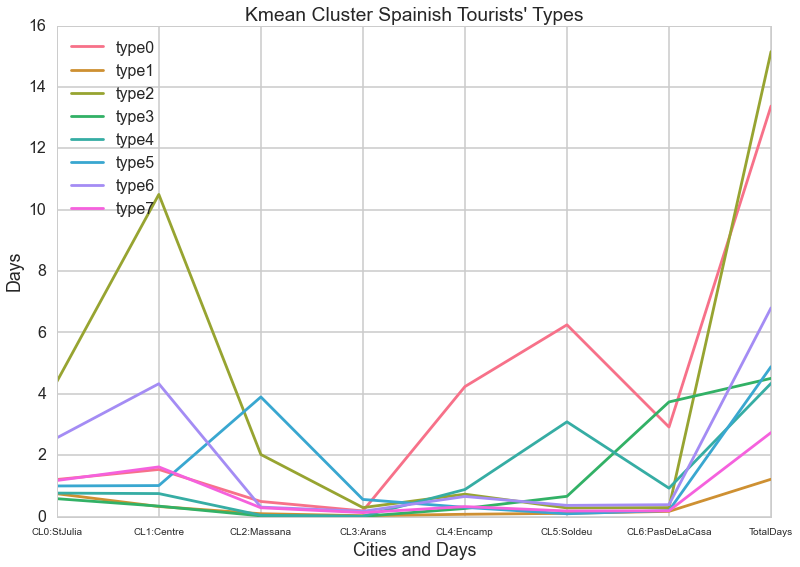

In [245]:
colors = sns.color_palette("husl", 8)

for i,cluster in enumerate(sptourist_type):
    
    name="type"+str(i)
    plt.plot(cluster,color=colors[i], label=name)
city_name= ['CL0:StJulia','CL1:Centre','CL2:Massana','CL3:Arans','CL4:Encamp','CL5:Soldeu','CL6:PasDeLaCasa',"TotalDays"]
x = [0,1, 2, 3, 4,5,6,7]
plt.xticks(x, city_name,size=10)
plt.title("Kmean Cluster Spainish Tourists' Types")
plt.legend(loc='upper left')
plt.ylabel('Days')
plt.xlabel("Cities and Days")
plt.show()

There are eight type of Spainish Toursits in our Cluster:

Type0 Toursits: They come around 13 days a month, they mainly visit 'CL5: Soldeu',sometimes they visit "CL4: Encamp"  and  'CL6: PasDeLaCasa', they may work in 'CL5: Soldeu'.

Type1 Toursits: They come around 1 days a month, they mainly spend their day in 'CL0: StJulia'.

Type2 Toursits: They come around 15 days a month, they mainly spend their day in 'CL1: Center', they may work in Center.

they spend their time in all of the cities, but most of days they go to CL5: Soldeu.

Type3 Toursits: They come around 4 days a month, they almost spend 4 days in 'CL6: PasDeLaCasa', so this group may visit 'CL6: PasDeLaCasa' weekly.

Type4 Toursits: They come around 4 day a month, they also almost spend their time in 'CL5: Soldeu', so they come once a month.

Type5 Toursits: They come around 7 days a month, they mainly spend their day in 'CL2: Massana'.

Type6 Toursits: They come around 7 days a month, they mainly spend their day in 'CL1: Center'.

Type7 Toursits: They come around 1 days a month, they only visit 'CL0: StJulia' and 'CL1: Center'.

There are eight type of Spainish Toursits in our Cluster:
Type0 Toursits: They come around 3 days a month, they only visit 'CL5: Soldeu' 'CL6: PasDeLaCasa', and they spend more days in CL6: PasDeLaCasa, so they will visit around weekly, or come once a week and stay three days.
Type1 Toursits: They come around 18 days a month, they mainly spend their time in 'CL4: Encamp', and sometime they will go to Centre and Arans.
Type3 Toursits: They come around 7 days a month, they spend their time in all of the cities, but most of days they go to Centre.
Type4 Toursits: They come around 6 days a month, they almost spend 6 days in 'CL6: PasDeLaCasa', so this group will visit 'CL6: PasDeLaCasa' weekly.
Type5 Toursits: They come around 1 day a month, they also almost spend their time in 'CL6: PasDeLaCasa', so they come once a month.
Type6 Toursits:
Type7 Toursits:

In [17]:
fr=pd.read_csv("201501_france_cdr_user_cities.csv")
fr.head()

,user_id,CL0 - StJulia,CL1 - Centre,CL2 - Massana,CL3 - Arans,CL4 - Encamp,CL5 - Soldeu,CL6 - PasDeLaCasa,Global,Other,Days
0,00a643ef6e416ea77c6b29c413b17988eadb93e07cc01a...,1,1,0,0,1,0,0,0,1,1
1,7b7be780d3796da251ea3d647dfae1c4aaf868ec1e8a52...,0,0,0,0,0,0,1,0,0,1
2,3cad1c56a009870e79dee4885b4a09a26bb91361403f49...,0,0,0,0,0,0,0,0,1,1
3,74b709c25a0756a0d617ce967b13323b285bd4ee9a2e1c...,0,0,0,0,0,0,0,0,1,1
4,54ff5c8e35f818c281be12adffffb4350280c043b690a0...,0,0,0,0,0,0,1,0,0,1


In [189]:
c0=fr['CL0 - StJulia']
c1=fr['CL1 - Centre']
c2=fr['CL2 - Massana']
c3=fr['CL3 - Arans']
c4=fr['CL4 - Encamp']
c5=fr['CL5 - Soldeu']
c6=fr['CL6 - PasDeLaCasa']
d=fr['Days']
fr_df=pd.concat([c0,c1, c2, c3,c4,c5,c6,d], axis=1)
fr_df.head()

,CL0 - StJulia,CL1 - Centre,CL2 - Massana,CL3 - Arans,CL4 - Encamp,CL5 - Soldeu,CL6 - PasDeLaCasa,Days
0,1,1,0,0,1,0,0,1
1,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,1


In [195]:
from sklearn.cross_validation import train_test_split
itrainF, itestF = train_test_split(fr_df, train_size=0.6)
k=km.fit(itrainF, y=None)

In [226]:
from sklearn import cluster
frkm=sklearn.cluster.KMeans(init='k-means++', n_init=7, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1)
frkm.fit(fr_df, y=None)
frtourist_type=km.cluster_centers_.tolist()

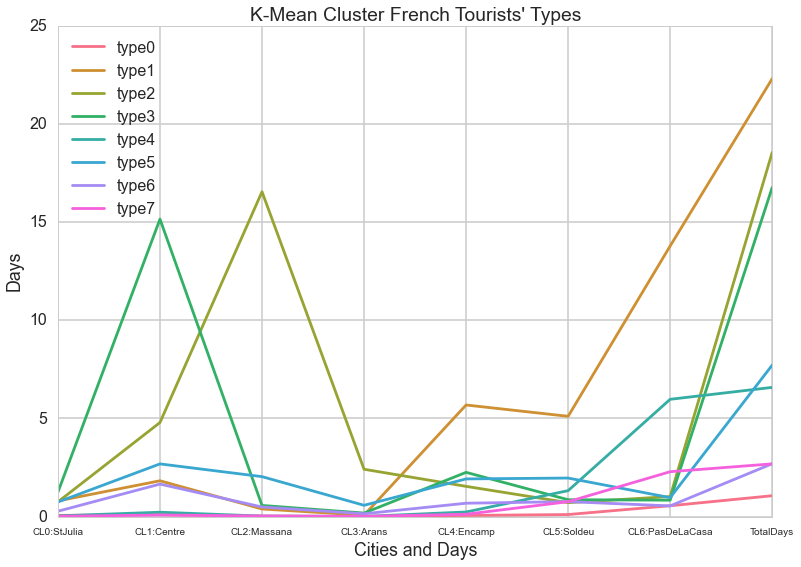

In [238]:
colors = sns.color_palette("husl", 8)
for i,cluster in enumerate(frtourist_type):
    
    name="type"+str(i)
    plt.plot(cluster,color=colors[i], label=name)
city_name= ['CL0:StJulia','CL1:Centre','CL2:Massana','CL3:Arans','CL4:Encamp','CL5:Soldeu','CL6:PasDeLaCasa',"TotalDays"]
x = [0,1, 2, 3, 4,5,6,7]
plt.xticks(x, city_name,size=10)
plt.title("K-Mean Cluster French Tourists' Types")
plt.legend(loc='upper left')
plt.ylabel('Days')
plt.xlabel("Cities and Days")
plt.show()

There are eight type of French Toursits in our Cluster:

Type0 Toursits: They come around 3 days a month, they only visit 'CL5: Soldeu' 'CL6: PasDeLaCasa', and they spend more days in CL6: PasDeLaCasa, so they will visit around weekly, or come once a week and stay three days.

Type1 Toursits: They come around 18 days a month, they mainly spend their time in 'CL4: Encamp', and sometime they will go to Centre and Arans.

Type3 Toursits: They come around 7 days a month, they spend their time in all of the cities, but most of days they go to Centre.

Type4 Toursits: They come around 6 days a month, they almost spend 6 days in 'CL6: PasDeLaCasa', so this group will visit 'CL6: PasDeLaCasa' weekly.

Type5 Toursits: They come around 1 day a month, they also almost spend their time in 'CL6: PasDeLaCasa', so they come once a month.

Type6 Toursits: They come around 1 day a month, they also almost spend their time in 'CL1: Center', so they come once a month.



In [201]:
x=km.fit_predict(itestF, y=None)
x

array([3, 4, 3, ..., 7, 5, 1], dtype=int32)

In [339]:
spuser=pd.read_csv('spuser_0102-04.csv')
spuser.head()

,Unnamed: 0,user_id,tower_id,set_tower_id
0,0,0226f25f5b49a9c77ebf4eceed456bc3155a1d5ba50153...,"[1760, 2030, 2030, 2030, 1760, 2030, 2030, 2030]","[1760, 2030]"
1,1,26dd7c1d853b228cae5d21cf1a4d7143baaabad8299165...,"[9011, 9031, 46, 9011, 9430, 1001, 9041, 56, 5...","[9031, 1001, 45, 46, 9040, 9041, 9042, 9011, 9..."
2,2,0d5357e20f6e097b5eeedaf7b67c89a6aa384bee22fda7...,"[460, 505, 56, 460, 460, 505, 56, 460]","[56, 505, 460]"
3,3,6fd835a1ed5fb2c9c4a923dc45fcf626fef570094cc934...,"[3630, 3630, 3630, 3230, 3230, 3230, 3521, 323...","[3520, 3521, 3230, 3630]"
4,4,dd2644bdcc497fcab9242c676a17e4278a7a4ce5f15cd4...,"[70, 70, 70, 70]",[70]


In [19]:
fruser=pd.read_csv('fruser_0102-04.csv')
fruser.head()

,Unnamed: 0,user_id,tower_id,set_tower_id
0,0,7b7be780d3796da251ea3d647dfae1c4aaf868ec1e8a52...,"[3530, 3530, 3530, 3530]",[3530]
1,1,4e793a498ee74f237dc6de2b6e582b83ec5257331776d7...,"[3040, 9080, 9080, 200, 9080, 9080, 200, 9080,...","[3040, 9080, 200]"
2,2,2786dd6755d92c4a4721596f7236f3a288edc9e35e7236...,"[3040, 3040, 3040, 3040, 3040, 3040]",[3040]
3,3,2934f48d0c80a3109e4b387a630b3de6533dc016dcc7f2...,"[445, 9032, 9032, 445, 445, 9032, 445, 445, 44...","[9032, 380, 445]"
4,4,60bd865a015eec6ecc298edc6dc9519e64ebefd9020115...,"[200, 1091, 1091, 19091, 1091, 1091, 1091, 109...","[200, 9080, 1091, 19091]"


In [20]:
tripadvisor.head()

,rating,long,place,address,lat,type
0,4.5,1.521835,\n\nHesperia Andorra la Vella\n,"Avinguda Doctor Mitjavila, 1 | Rotonda, Andorr...",42.506317,hotel
1,4.5,1.522746,\n\nAndorra Park Hotel\n,"C. Les Canals, 24, Andorra la Vella AD500, And...",42.509279,hotel
2,4.0,1.519714,\n\nHoliday Inn Andorra\n,"C/ Prat de la Creu 88, Andorra la Vella AD500,...",42.505710,hotel
3,4.5,1.532549,\n\nHotel Plaza\n,"C/ Na Maria Pla 19-21, Andorra la Vella AD500,...",42.506940,hotel
4,4.5,1.666049,\n\nSport Hotel Hermitage & Spa\n,"Crta General s/n, Soldeu AD100, Andorra",42.577791,hotel


In [71]:
user_interests=[]
fr_ids=fruser.set_tower_id.values.tolist()
sp_ids=spuser.set_tower_id.values.tolist()

In [346]:
len(sp_ids)

71432

In [287]:
fr_visitids=fruser.tower_id.values.tolist()
sp_visitids=spuser.tower_id.values.tolist()

# Calculate tourists' interest

In [290]:
p_dic={}
interest_cat=list(cat)
for num in interest_cat:
    p_dic[num]=0
    

In [314]:
interests=list(set(list(id_interest.values())))
interests

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [330]:
interest_pair=pd.read_csv("interest.csv")
interest_pair.head()
index=interest_pair.Interest_index.values.tolist()
category=interest_pair.Category.values.tolist()
pairs={}
for i in xrange(len(index)):
    n=index[i]
    pairs[n]=category[i]
pairs

{1: 'Shopping Interest',
 2: 'Nature Interest',
 3: 'Wellness Interest',
 4: 'Leisure Interest',
 5: 'Gastronomic Interest',
 6: 'Culture Interest',
 7: 'Events Interest',
 8: 'Sight_Landmark',
 9: 'Other'}

In [326]:
interest_pair.head()

,Interest_index,Category
0,1,Shopping Interest
1,2,Nature Interest
2,3,Wellness Interest
3,4,Leisure Interest
4,5,Gastronomic Interest


In [331]:
interest_cat=list(cat)
fr_interest={}
id_cat={}
fr_like=[]
fr_like_cat=[]
for p in fr_ids:
    user_interest={}
    for interest in interests:
        user_interest[interest]=0
        
        
    n=len(p)-1
    p=p[1:n]    
    h=p.split(", ")

    for i in h:

        if i in towers:
            x=id_interest[i]
            y=user_interest[x]+1
            user_interest[x]=y 
    like=max(user_interest.iteritems(), key=operator.itemgetter(1))[0]
    h=pairs[like]
    fr_like_cat.append(h)
    fr_like.append(like)


In [333]:
fruser['Interests']=fr_like
fruser['Category']=fr_like_cat
fruser.head()

,Unnamed: 0,user_id,tower_id,set_tower_id,Interests,Category
0,0,7b7be780d3796da251ea3d647dfae1c4aaf868ec1e8a52...,"[3530, 3530, 3530, 3530]",[3530],4,Leisure Interest
1,1,4e793a498ee74f237dc6de2b6e582b83ec5257331776d7...,"[3040, 9080, 9080, 200, 9080, 9080, 200, 9080,...","[3040, 9080, 200]",4,Leisure Interest
2,2,2786dd6755d92c4a4721596f7236f3a288edc9e35e7236...,"[3040, 3040, 3040, 3040, 3040, 3040]",[3040],4,Leisure Interest
3,3,2934f48d0c80a3109e4b387a630b3de6533dc016dcc7f2...,"[445, 9032, 9032, 445, 445, 9032, 445, 445, 44...","[9032, 380, 445]",4,Leisure Interest
4,4,60bd865a015eec6ecc298edc6dc9519e64ebefd9020115...,"[200, 1091, 1091, 19091, 1091, 1091, 1091, 109...","[200, 9080, 1091, 19091]",4,Leisure Interest


In [347]:
interest_cat=list(cat)
sp_interest={}
id_cat={}
sp_like=[]
sp_like_cat=[]
for p in sp_ids:
    user_interest={}
    for interest in interests:
        user_interest[interest]=0
        
        
    n=len(p)-1
    p=p[1:n]    
    h=p.split(", ")

    for i in h:

        if i in towers:
            x=id_interest[i]
            y=user_interest[x]+1
            user_interest[x]=y 
    like=max(user_interest.iteritems(), key=operator.itemgetter(1))[0]
    h=pairs[like]
    sp_like_cat.append(h)
    sp_like.append(like)


In [349]:
spuser['Interests']=sp_like
spuser['Category']=sp_like_cat
spuser.head()

,Unnamed: 0,user_id,tower_id,set_tower_id,Interests,Category
0,0,0226f25f5b49a9c77ebf4eceed456bc3155a1d5ba50153...,"[1760, 2030, 2030, 2030, 1760, 2030, 2030, 2030]","[1760, 2030]",9,Other
1,1,26dd7c1d853b228cae5d21cf1a4d7143baaabad8299165...,"[9011, 9031, 46, 9011, 9430, 1001, 9041, 56, 5...","[9031, 1001, 45, 46, 9040, 9041, 9042, 9011, 9...",5,Gastronomic Interest
2,2,0d5357e20f6e097b5eeedaf7b67c89a6aa384bee22fda7...,"[460, 505, 56, 460, 460, 505, 56, 460]","[56, 505, 460]",1,Shopping Interest
3,3,6fd835a1ed5fb2c9c4a923dc45fcf626fef570094cc934...,"[3630, 3630, 3630, 3230, 3230, 3230, 3521, 323...","[3520, 3521, 3230, 3630]",9,Other
4,4,dd2644bdcc497fcab9242c676a17e4278a7a4ce5f15cd4...,"[70, 70, 70, 70]",[70],7,Events Interest


# Recommend What's Popular

In [134]:
frids_num={}
towers=[]
for i in tower_ids:
    x=str(i)
    towers.append(x)
    frids_num[x]=0

In [268]:
spids_num={}
towers=[]
for i in tower_ids:
    x=str(i)
    towers.append(x)
    spids_num[x]=0

Find Popular Id towers

In [135]:
for p in fr_ids:
    n=len(p)-1
    p=p[1:n]    
    h=p.split(", ")

    for i in h:

        if i in towers:
            x=frids_num[i]
            y=x+1
            frids_num[i]=y   


In [269]:
for p in sp_ids:
    n=len(p)-1
    p=p[1:n]    
    h=p.split(", ")

    for i in h:

        if i in towers:
            x=spids_num[i]
            y=x+1
            spids_num[i]=y   

In [271]:
import operator
spbest=max(spids_num.iteritems(), key=operator.itemgetter(1))

Find Popular Interest

In [251]:
frbest[0]

'3040'

In [283]:
import operator
s=max(spids_num.iteritems(), key=operator.itemgetter(1))[0]
print "Spainish Toursts'"
print "best id_tower:",spbest[0]
print "Interest:",id_cat[s]
print "geolocation:",id_lat[s], id_lng[s]

Spainish Toursts'
best id_tower: 340
Interest: Shopping Interest
geolocation: 42.44805556 1.4825


In [284]:
f=max(frids_num.iteritems(), key=operator.itemgetter(1))[0]
print "Spainish Toursts'"
print "best id_tower:",spbest[0]
print "Interest:",id_cat[f]
print "geolocation:",id_lat[f], id_lng[f]

Spainish Toursts'
best id_tower: 340
Interest: Shopping Interest, Leisure Interest
geolocation: 42.54222222 1.734722222


The most popular site is "3040", the main tag is 4="Nature Interest, Leisure Interest"

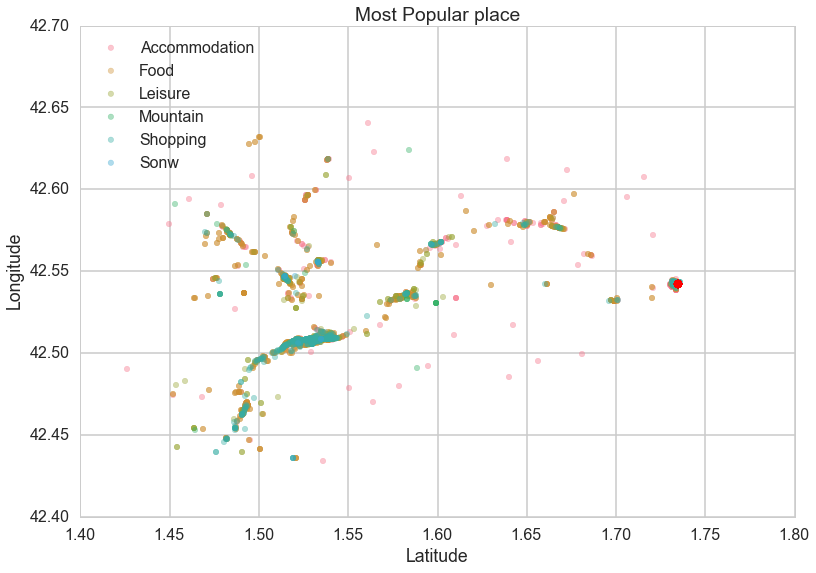

In [267]:
colors = sns.color_palette("husl", 8)
cluster_c=0
cat=civic['category'].unique().tolist()

for i,cluster in enumerate(cat):

    count = 0
    for ind in civic[civic['category']==cluster].index:
        ind=int(ind)
        count +=1
        if count==1:
            x=civic.loc[ind,'lat'].tolist()
            y=civic.loc[ind,'lng'].tolist()

            plt.scatter(float(y), float(x), color=colors[i], label=cluster, s=3*10, alpha=0.4)
        else:
            x=civic.loc[ind,'lat']
            y=civic.loc[ind,'lng']

            plt.scatter(float(y), float(x), color=colors[i], s=3*10, alpha=0.4)

            x=best[0]
            n=i+1
            plt.scatter(id_lng[f], id_lat[f], color='red', s=6*10, alpha=0.5)
plt.legend(loc='upper left')    
plt.title("Most Popular place")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [266]:
from IPython.display import HTML
HTML('<iframe width=100% height=520 frameborder=0 src=https://www.google.com/maps/embed?pb=!1m14!1m8!1m3!1d734.900916042566!2d1.7339873!3d42.5424732!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x0%3A0x0!2zNDLCsDMyJzMyLjAiTiAxwrA0NCcwNS4wIkU!5e0!3m2!1sen!2sus!4v1449774098210  allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>')

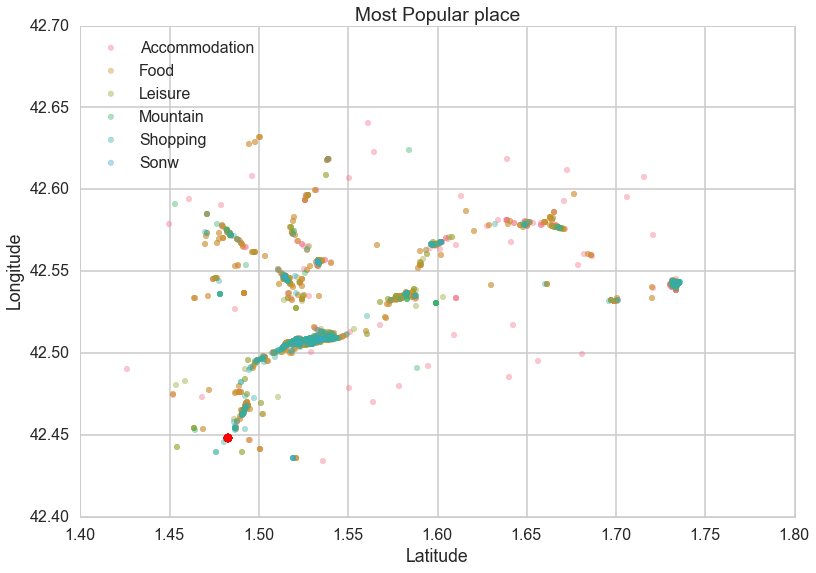

In [285]:
colors = sns.color_palette("husl", 8)
cluster_c=0
cat=civic['category'].unique().tolist()

for i,cluster in enumerate(cat):

    count = 0
    for ind in civic[civic['category']==cluster].index:
        ind=int(ind)
        count +=1
        if count==1:
            x=civic.loc[ind,'lat'].tolist()
            y=civic.loc[ind,'lng'].tolist()

            plt.scatter(float(y), float(x), color=colors[i], label=cluster, s=3*10, alpha=0.4)
        else:
            x=civic.loc[ind,'lat']
            y=civic.loc[ind,'lng']

            plt.scatter(float(y), float(x), color=colors[i], s=3*10, alpha=0.4)

            x=best[0]
            n=i+1
            plt.scatter(id_lng[s], id_lat[s], color='red', s=6*10, alpha=0.5)
plt.legend(loc='upper left')    
plt.title("Most Popular place")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [286]:
from IPython.display import HTML
HTML('<iframe width=100% height=520 frameborder=0 src=https://www.google.com/maps/embed?pb=!1m18!1m12!1m3!1d736.0112931119297!2d1.481952824210985!3d42.44805496672415!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x0%3A0x0!2zNDLCsDI2JzUzLjAiTiAxwrAyOCc1Ny4wIkU!5e0!3m2!1sen!2sus!4v1449775535390  allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>')

Based on the most popular place for each contry, we could recommend the stores around the area for them